<a href="https://colab.research.google.com/github/MWFK/TimeSeries_Sequence_with_TensorFlow/blob/main/0-%20WindowdMA_TraillingCentered.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Source

https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/

# Centered Moving Average

The value at time (t) is calculated as the average of raw observations at, before, and after time (t).

For example, a center moving average with a window of 3 would be calculated as:

center_ma(t) = mean(obs(t-1), obs(t), obs(t+1))


This method requires knowledge of future values, and as such is used on time series analysis to better understand the dataset.

A center moving average can be used as a general method to remove trend and seasonal components from a time series, a method that we often cannot use when forecasting.

# Trailing Moving Average

The value at time (t) is calculated as the average of the raw observations at and before the time (t).

For example, a trailing moving average with a window of 3 would be calculated as:

trail_ma(t) = mean(obs(t-2), obs(t-1), obs(t))

Trailing moving average only uses historical observations and is used on time series forecasting.

# Data Expectations

Calculating a moving average of a time series makes some assumptions about your data.

It is assumed that both trend and seasonal components have been removed from your time series.

This means that your time series is stationary, or does not show obvious trends (long-term increasing or decreasing movement) or seasonality (consistent periodic structure).

There are many methods to remove trends and seasonality from a time series dataset when forecasting. Two good methods for each are to use the differencing method and to model the behavior and explicitly subtract it from the series.

We'll calculate the Trailling Moving Average values for use as data preparation, feature engineering, and for directly making predictions.

# Data

In [2]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6220  100  6220    0     0  69111      0 --:--:-- --:--:-- --:--:-- 69887


            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44


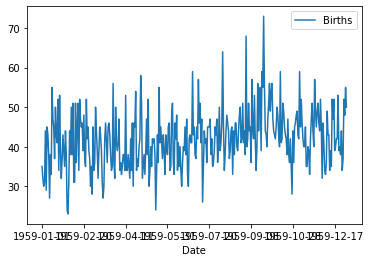

In [3]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
print(series.head()) # number of births per date
series.plot()
pyplot.show()

# Moving Average as Data Preparation

Smoothing is useful as a data preparation technique as it can reduce the random variation in the observations and better expose the structure of the underlying causal processes.

The rolling() function on the Series Pandas object will automatically group observations into a window. You can specify the window size, and by default a trailing window is created. Once the window is created, we can take the mean value, and this is our transformed dataset.

               Births
Date                 
1959-01-01        NaN
1959-01-02        NaN
1959-01-03  32.333333
1959-01-04  31.000000
1959-01-05  35.000000
1959-01-06  34.666667
1959-01-07  39.333333
1959-01-08  39.000000
1959-01-09  42.000000
1959-01-10  36.000000


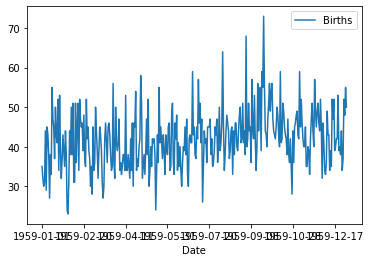

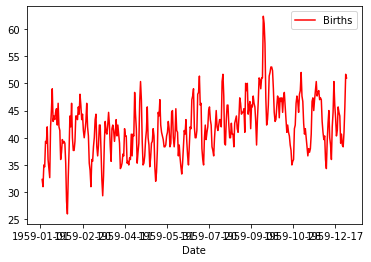

In [4]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
# Tail-rolling average transform
# The rolling() function on the Series Pandas object will automatically group observations into a window. 
# You can specify the window size, and by default a trailing window is created.
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
pyplot.show()

# Moving Average as Feature Engineering

Below is an example of including the moving average of the previous 3 values as a new feature, as wellas a lag-1 input feature for the Daily Female Births dataset.

In [7]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

series = read_csv('daily-total-female-births.csv', header=0, index_col=0).head(10)
df = DataFrame(series.values)
width = 3

print(series)

lag1 = df.shift(1)
print('lag1')
print(lag1)

lag3 = df.shift(width - 1)
print('lag3')
print(lag3)

window = lag3.rolling(window=width)
print('window')
print(window)

means = window.mean()
print('means')
print(means)

dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't-1', 't+1']
print(dataframe.head(10))

'''
We can see that the first 3 rows cannot be used and must be discarded. 
The first row of the lag1 dataset cannot be used because there are no previous observations to predict the first observation, therefore a NaN value is used.
'''

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
1959-01-06      29
1959-01-07      45
1959-01-08      43
1959-01-09      38
1959-01-10      27
lag1
      0
0   NaN
1  35.0
2  32.0
3  30.0
4  31.0
5  44.0
6  29.0
7  45.0
8  43.0
9  38.0
lag3
      0
0   NaN
1   NaN
2  35.0
3  32.0
4  30.0
5  31.0
6  44.0
7  29.0
8  45.0
9  43.0
window
Rolling [window=3,center=False,axis=0]
means
           0
0        NaN
1        NaN
2        NaN
3        NaN
4  32.333333
5  31.000000
6  35.000000
7  34.666667
8  39.333333
9  39.000000
        mean   t-1  t+1
0        NaN   NaN   35
1        NaN  35.0   32
2        NaN  32.0   30
3        NaN  30.0   31
4  32.333333  31.0   44
5  31.000000  44.0   29
6  35.000000  29.0   45
7  34.666667  45.0   43
8  39.333333  43.0   38
9  39.000000  38.0   27


'\nWe can see that the first 3 rows cannot be used and must be discarded. \nThe first row of the lag1 dataset cannot be used because there are no previous observations to predict the first observation, therefore a NaN value is used.\n'

# Moving Average as Prediction

History [35] 

Test [array([31]), array([44]), array([29]), array([45]), array([43]), array([38]), array([27])] 

predicted=32.333333, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=35.000000, expected=29.000000
predicted=34.666667, expected=45.000000
predicted=39.333333, expected=43.000000
predicted=39.000000, expected=38.000000
predicted=42.000000, expected=27.000000
Test MSE: 79.000


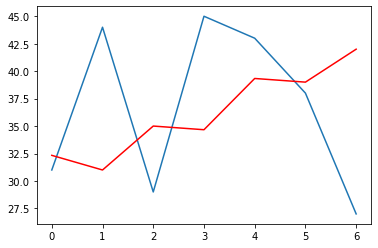

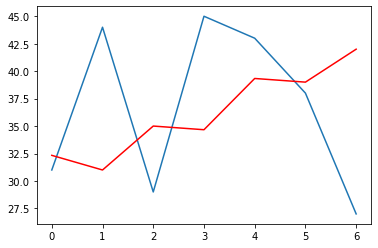

In [13]:
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

series = read_csv('daily-total-female-births.csv', header=0, index_col=0).head(10)

# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
print('History', history[0],'\n')
test = [X[i] for i in range(window, len(X))]
print('Test', test,'\n')
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# zoom plot
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='red')
pyplot.show()